<a href="https://colab.research.google.com/github/radhika1603/Marketing-Research-Assignment/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading data...

First few rows of the dataset:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex

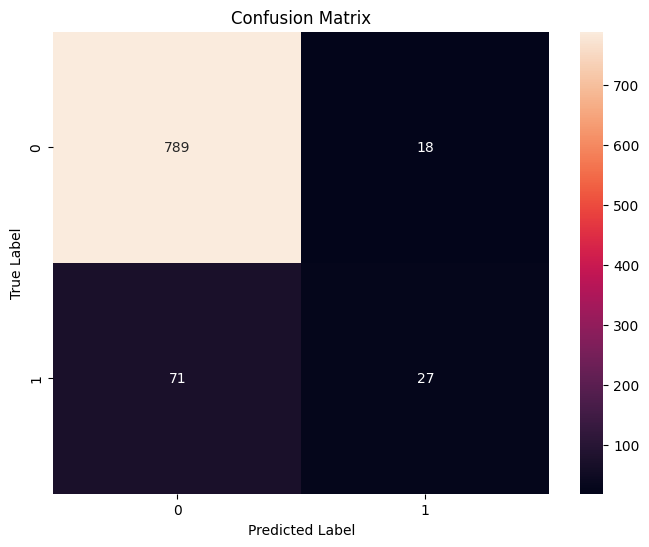

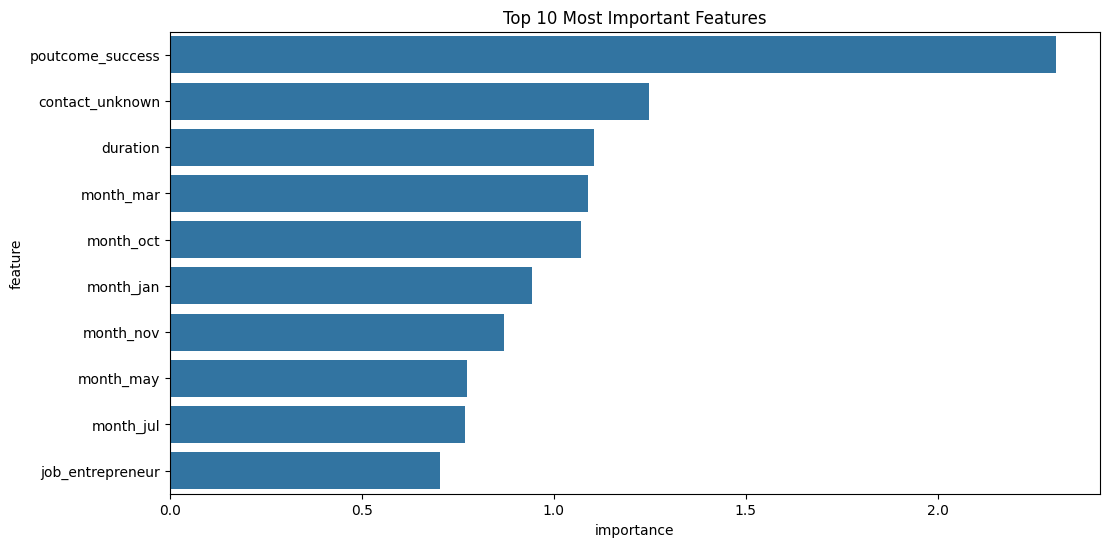


Class distribution in target variable:
y
0    0.88476
1    0.11524
Name: proportion, dtype: float64


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def load_data():
    # Read Excel file
    # If your data is in a specific sheet, you can specify sheet_name parameter
    df = pd.read_excel("bank marketing - logistic.xlsx")
    return df

def prepare_data(df):
    # Identify categorical columns
    categorical_columns = ['job', 'marital', 'education', 'default', 'housing',
                         'loan', 'contact', 'month', 'poutcome']

    # Create dummy variables for categorical columns
    df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

    # Convert target variable to numeric
    le = LabelEncoder()
    df_encoded['y'] = le.fit_transform(df_encoded['y'])

    # Separate features and target
    X = df_encoded.drop('y', axis=1)
    y = df_encoded['y']

    return X, y

def train_logistic_regression(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    # Train logistic regression model
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    return model, X_train, X_test, y_train, y_test, y_pred

def evaluate_model(model, X_train, X_test, y_train, y_test, y_pred):
    # Print model performance
    print("Training Accuracy:", model.score(X_train, y_train))
    print("Testing Accuracy:", model.score(X_test, y_test))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': abs(model.coef_[0])
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title('Top 10 Most Important Features')
    plt.show()

def main():
    # Load data
    print("Loading data...")
    df = load_data()

    # Display first few rows and basic information
    print("\nFirst few rows of the dataset:")
    print(df.head())
    print("\nDataset Info:")
    print(df.info())

    # Prepare the data
    print("\nPreparing data...")
    X, y = prepare_data(df)

    # Train the model
    print("\nTraining model...")
    model, X_train, X_test, y_train, y_test, y_pred = train_logistic_regression(X, y)

    # Evaluate the model
    print("\nEvaluating model...")
    evaluate_model(model, X_train, X_test, y_train, y_test, y_pred)

    # Print additional model insights
    print("\nClass distribution in target variable:")
    print(pd.Series(y).value_counts(normalize=True))

if __name__ == "__main__":
    main()